In [18]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
combined_data = pd.read_csv('combined data_1002.csv').drop(columns='result')
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 21 columns):
Unnamed: 0        40839 non-null int64
date              40839 non-null object
home_team         40839 non-null object
away_team         40839 non-null object
home_score        40839 non-null int64
away_score        40839 non-null int64
tournament        40839 non-null object
city              40839 non-null object
country           40839 non-null object
neutral           40839 non-null bool
year              40839 non-null int64
month             40839 non-null int64
goal_diff         40839 non-null int64
home_result       40839 non-null object
lat               0 non-null float64
lng               0 non-null float64
host_continent    40839 non-null object
home_continent    40839 non-null object
away_continent    40839 non-null object
results           40839 non-null object
total_goals       40839 non-null int64
dtypes: bool(1), float64(2), int64(7), object(11)
memory usage: 4.

In [3]:
wins = combined_data.results.value_counts()
wins_df = pd.DataFrame(wins)
wins_df = wins_df.reset_index()
wins_df = wins_df.rename(columns={'index':'team'})
wins_df

,team,results
0,Tie,9431
1,Brazil,625
2,England,563
3,Germany,551
4,Argentina,524
...,...,...
297,Raetia,1
298,Central Spain,1
299,Curacao,1
300,Romani people,1


In [4]:
grouped_home = combined_data.groupby('home_team',as_index=False).sum().drop(columns=['Unnamed: 0','neutral','year','month','goal_diff','lat','lng'])
grouped_home_score = grouped_home.rename(columns={'home_score':'home_goals','away_score':'home_lost_goals','total_goals':'home_goals_per_game'})
grouped_home_score

,home_team,home_goals,home_lost_goals,home_goals_per_game
0,Abkhazia,36,11,47
1,Afghanistan,49,59,108
2,Albania,189,196,385
3,Alderney,5,27,32
4,Algeria,508,247,755
...,...,...,...,...
304,Yugoslavia,439,236,675
305,Zambia,557,244,801
306,Zanzibar,63,100,163
307,Zimbabwe,293,170,463


In [5]:
grouped_away = combined_data.groupby('away_team',as_index=False).sum().drop(columns=['Unnamed: 0','neutral','year','month','goal_diff','lat','lng'])
grouped_away_score = grouped_away.rename(columns={'home_score':'away_lost_goals','away_score':'away_goals','total_goals':'away_goals_per_game'})
grouped_away_score

,away_team,away_lost_goals,away_goals,away_goals_per_game
0,Abkhazia,13,12,25
1,Afghanistan,153,63,216
2,Albania,317,105,422
3,Alderney,48,10,58
4,Algeria,268,185,453
...,...,...,...,...
301,Yugoslavia,501,501,1002
302,Zambia,473,548,1021
303,Zanzibar,334,124,458
304,Zimbabwe,343,316,659


In [6]:
overview_score = pd.merge(grouped_home_score,grouped_away_score,left_on='home_team',right_on='away_team',how='outer')
overview_score

,home_team,home_goals,home_lost_goals,home_goals_per_game,away_team,away_lost_goals,away_goals,away_goals_per_game
0,Abkhazia,36.0,11.0,47.0,Abkhazia,13.0,12.0,25.0
1,Afghanistan,49.0,59.0,108.0,Afghanistan,153.0,63.0,216.0
2,Albania,189.0,196.0,385.0,Albania,317.0,105.0,422.0
3,Alderney,5.0,27.0,32.0,Alderney,48.0,10.0,58.0
4,Algeria,508.0,247.0,755.0,Algeria,268.0,185.0,453.0
...,...,...,...,...,...,...,...,...
308,Åland Islands,47.0,41.0,88.0,Åland Islands,34.0,26.0,60.0
309,NaN,NaN,NaN,NaN,Asturias,1.0,3.0,4.0
310,NaN,NaN,NaN,NaN,Surrey,1.0,3.0,4.0
311,NaN,NaN,NaN,NaN,Two Sicilies,8.0,2.0,10.0


In [7]:
grouped_home_count = combined_data.groupby('home_team',as_index=False).count().drop(columns=['Unnamed: 0','neutral','year','month','goal_diff','lat','lng',
                                                                       'date','away_team','home_score','away_score','tournament','city',
                                                                       'country','neutral','home_result','away_continent','results',
                                                                       'total_goals','host_continent'])
grouped_home_count

,home_team,home_continent
0,Abkhazia,18
1,Afghanistan,37
2,Albania,172
3,Alderney,7
4,Algeria,286
...,...,...
304,Yugoslavia,190
305,Zambia,297
306,Zanzibar,58
307,Zimbabwe,186


In [8]:
grouped_away_count = combined_data.groupby('away_team',as_index=False).count().drop(columns=['Unnamed: 0','neutral','year','month','goal_diff','lat','lng',
                                                                       'date','home_team','home_score','away_score','tournament','city',
                                                                       'country','neutral','home_result','home_continent','results',
                                                                       'total_goals','host_continent'])
grouped_away_count

,away_team,away_continent
0,Abkhazia,10
1,Afghanistan,69
2,Albania,154
3,Alderney,12
4,Algeria,211
...,...,...
301,Yugoslavia,290
302,Zambia,410
303,Zanzibar,147
304,Zimbabwe,261


In [9]:
overview_count = pd.merge(grouped_home_count,grouped_away_count, left_on='home_team',right_on='away_team',how='outer')
overview_count = overview_count.rename(columns={'home_continent':'home_game_count','away_continent':'away_game_count'})

In [10]:
overview_combined = pd.merge(overview_count,overview_score,on=['home_team','away_team'],how='outer')
overview_combined = overview_combined.rename(columns={'home_team':'team'})
overview_combined

,team,home_game_count,away_team,away_game_count,home_goals,home_lost_goals,home_goals_per_game,away_lost_goals,away_goals,away_goals_per_game
0,Abkhazia,18.0,Abkhazia,10.0,36.0,11.0,47.0,13.0,12.0,25.0
1,Afghanistan,37.0,Afghanistan,69.0,49.0,59.0,108.0,153.0,63.0,216.0
2,Albania,172.0,Albania,154.0,189.0,196.0,385.0,317.0,105.0,422.0
3,Alderney,7.0,Alderney,12.0,5.0,27.0,32.0,48.0,10.0,58.0
4,Algeria,286.0,Algeria,211.0,508.0,247.0,755.0,268.0,185.0,453.0
...,...,...,...,...,...,...,...,...,...,...
308,Åland Islands,27.0,Åland Islands,19.0,47.0,41.0,88.0,34.0,26.0,60.0
309,NaN,NaN,Asturias,1.0,NaN,NaN,NaN,1.0,3.0,4.0
310,NaN,NaN,Surrey,1.0,NaN,NaN,NaN,1.0,3.0,4.0
311,NaN,NaN,Two Sicilies,4.0,NaN,NaN,NaN,8.0,2.0,10.0


In [11]:
overview_combined['total_goals']=overview_combined.home_goals + overview_combined.away_goals
overview_combined['total_games']=overview_combined.home_game_count + overview_combined.away_game_count


In [12]:
overview_combined

,team,home_game_count,away_team,away_game_count,home_goals,home_lost_goals,home_goals_per_game,away_lost_goals,away_goals,away_goals_per_game,total_goals,total_games
0,Abkhazia,18.0,Abkhazia,10.0,36.0,11.0,47.0,13.0,12.0,25.0,48.0,28.0
1,Afghanistan,37.0,Afghanistan,69.0,49.0,59.0,108.0,153.0,63.0,216.0,112.0,106.0
2,Albania,172.0,Albania,154.0,189.0,196.0,385.0,317.0,105.0,422.0,294.0,326.0
3,Alderney,7.0,Alderney,12.0,5.0,27.0,32.0,48.0,10.0,58.0,15.0,19.0
4,Algeria,286.0,Algeria,211.0,508.0,247.0,755.0,268.0,185.0,453.0,693.0,497.0
...,...,...,...,...,...,...,...,...,...,...,...,...
308,Åland Islands,27.0,Åland Islands,19.0,47.0,41.0,88.0,34.0,26.0,60.0,73.0,46.0
309,NaN,NaN,Asturias,1.0,NaN,NaN,NaN,1.0,3.0,4.0,NaN,NaN
310,NaN,NaN,Surrey,1.0,NaN,NaN,NaN,1.0,3.0,4.0,NaN,NaN
311,NaN,NaN,Two Sicilies,4.0,NaN,NaN,NaN,8.0,2.0,10.0,NaN,NaN


In [13]:
overview_combined_wins = pd.merge(overview_combined,wins_df,how='outer')
overview_combined_wins

,team,home_game_count,away_team,away_game_count,home_goals,home_lost_goals,home_goals_per_game,away_lost_goals,away_goals,away_goals_per_game,total_goals,total_games,results
0,Abkhazia,18.0,Abkhazia,10.0,36.0,11.0,47.0,13.0,12.0,25.0,48.0,28.0,12.0
1,Afghanistan,37.0,Afghanistan,69.0,49.0,59.0,108.0,153.0,63.0,216.0,112.0,106.0,29.0
2,Albania,172.0,Albania,154.0,189.0,196.0,385.0,317.0,105.0,422.0,294.0,326.0,82.0
3,Alderney,7.0,Alderney,12.0,5.0,27.0,32.0,48.0,10.0,58.0,15.0,19.0,3.0
4,Algeria,286.0,Algeria,211.0,508.0,247.0,755.0,268.0,185.0,453.0,693.0,497.0,209.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
313,Tie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9431.0
314,Western Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0
315,Two Sicilies,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
316,Asturias,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [14]:
overview_combined_wins['winning_rate']=overview_combined_wins.results / overview_combined_wins.total_games
overview_combined_wins['ttl_lost_goals']=overview_combined_wins.home_lost_goals + overview_combined_wins.away_lost_goals
overview_combined_wins['net_goals']=overview_combined_wins.total_goals - overview_combined_wins.ttl_lost_goals
overview_combined_ranked = overview_combined_wins.sort_values(by='winning_rate',ascending=False)
overview_combined_ranked.head(20)

,team,home_game_count,away_team,away_game_count,home_goals,home_lost_goals,home_goals_per_game,away_lost_goals,away_goals,away_goals_per_game,total_goals,total_games,results,winning_rate,ttl_lost_goals,net_goals
303,Yorkshire,5.0,Yorkshire,2.0,19.0,7.0,26.0,4.0,8.0,12.0,27.0,7.0,5.0,0.714286,11.0,16.0
202,Padania,28.0,Padania,15.0,66.0,18.0,84.0,15.0,52.0,67.0,118.0,43.0,29.0,0.674419,33.0,85.0
138,Jersey,48.0,Jersey,34.0,129.0,40.0,169.0,40.0,52.0,92.0,181.0,82.0,55.0,0.670732,80.0,101.0
65,County of Nice,4.0,County of Nice,5.0,7.0,5.0,12.0,8.0,12.0,20.0,19.0,9.0,6.0,0.666667,13.0,6.0
210,Parishes of Jersey,2.0,Parishes of Jersey,1.0,11.0,3.0,14.0,1.0,0.0,1.0,11.0,3.0,2.0,0.666667,4.0,7.0
24,Basque Country,32.0,Basque Country,25.0,83.0,35.0,118.0,40.0,71.0,111.0,154.0,57.0,37.0,0.649123,75.0,79.0
35,Brazil,563.0,Brazil,414.0,1396.0,466.0,1862.0,422.0,748.0,1170.0,2144.0,977.0,625.0,0.639713,888.0,1256.0
6,Andalusia,12.0,Andalusia,1.0,23.0,13.0,36.0,1.0,2.0,3.0,25.0,13.0,8.0,0.615385,14.0,11.0
221,Rhodes,11.0,Rhodes,7.0,21.0,12.0,33.0,7.0,8.0,15.0,29.0,18.0,11.0,0.611111,19.0,10.0
66,Crimea,1.0,Crimea,4.0,0.0,5.0,5.0,6.0,7.0,13.0,7.0,5.0,3.0,0.600000,11.0,-4.0


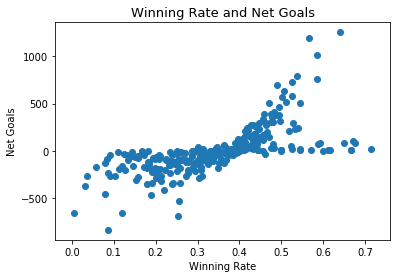

In [29]:
x = overview_combined_ranked.winning_rate
y = overview_combined_ranked.net_goals

plt.scatter(x,y)
plt.figsize=(16,9)
plt.title('Winning Rate and Net Goals',fontsize = 13)
plt.xlabel('Winning Rate')
plt.ylabel('Net Goals')

plt.show()